<a href="https://colab.research.google.com/github/priyankaborwanker/Mushroom-Classification-using-Classical-ML-/blob/main/ML_HW_Assignment_BT19CSE018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Mushroom Classification using SVMs, Decision Trees and Regression**

**Dataset: [UCI ML Mushroom Classification Dataset](https://www.kaggle.com/datasets/uciml/mushroom-classification)**

**Part 1: Data Preprocessing**

In [ ]:
#Libraries
import numpy as np
import pandas as pd

In [ ]:
#Connecting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dfmushroom = pd.read_csv('/content/gdrive/MyDrive/ML-HW-Assignment-BT19CSE018/mushrooms.csv')
dfmushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
dfmushroom.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [ ]:
#We can drop the attributes with low variance
dfmushroom.drop(columns='veil-type', inplace=True)
dfmushroom.drop(columns='gill-attachment', inplace=True)
dfmushroom.drop(columns='veil-color', inplace=True)
dfmushroom.drop(columns='ring-number', inplace=True)
dfmushroom.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728
stalk-shape,8124,2,t,4608


In [ ]:
#Check for null values
dfmushroom.isnull().sum()
#No null values are present so we donot need to clean data further

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfmushroom.columns:
    dfmushroom = dfmushroom.apply(le.fit_transform)

In [ ]:
dfX = dfmushroom.iloc[:,1:]
dfY = dfmushroom['class']
print('Encoded Labels: ')
dfX.head(5)

Encoded Labels: 


,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,0,1,4,0,3,2,2,7,7,4,2,3,5
1,5,2,9,1,0,0,0,4,0,2,2,2,7,7,4,3,2,1
2,0,2,8,1,3,0,0,5,0,2,2,2,7,7,4,3,2,3
3,5,3,8,1,6,0,1,5,0,3,2,2,7,7,4,2,3,5
4,5,2,3,0,5,1,0,4,1,3,2,2,7,7,0,3,0,1


**Part 2: Classification using SVM, Multilayer Perceptrons and Decision Trees**

In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import KFold
skf = KFold(n_splits=4, shuffle=True)

In [ ]:
accuracy_report = dict()
def train(modelname, dfX, dfY):
    print(f'using model: {modelname} '.center(100,'='),'\n')
    idx = 0
    model_accuracy =[]
    for _train,_test in skf.split(dfX, dfY):
        idx += 1
        print(f'Fold Number {idx} '.center(100,'='), '\n')
        modelname.fit(dfX.iloc[_train],dfY.iloc[_train])
        print('Confusion Matrix'.center(70,'-'), '\n')
        ypred = modelname.predict(dfX.iloc[_test])
        print(confusion_matrix(dfY.iloc[_test],ypred), '\n')
        print('Classification Report'.center(70,'-'), '\n')
        print(classification_report(dfY.iloc[_test],ypred))
        model_accuracy.append(accuracy_score(dfY.iloc[_test],ypred))
    print('='*100)
    print('The average accurecy of this model is {:.02f}%'.format(np.array(model_accuracy).mean()*100))
    accuracy_report[modelname] = round(np.array(model_accuracy).mean()*100,2)    

In [ ]:
svc_model = SVC(kernel='linear')
train(svc_model,dfX,dfY)

=================================using model: SVC(kernel='linear') ================================= 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[1029   39]
 [  88  875]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1068
           1       0.96      0.91      0.93       963

    accuracy                           0.94      2031
   macro avg       0.94      0.94      0.94      2031
weighted avg       0.94      0.94      0.94      2031

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[984  51]
 [ 93 903]] 

------------------------Classification Report------------------------- 

              prec

In [ ]:
svc_model = SVC(kernel='rbf')
train(svc_model,dfX,dfY)

========================================using model: SVC() ========================================= 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[1058    0]
 [  16  957]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1058
           1       1.00      0.98      0.99       973

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[1056    0]
 [  16  959]] 

------------------------Classification Report------------------------- 

              

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes = (70,), solver = 'sgd', learning_rate_init = 0.0005)
train(mlp_model, dfX,dfY)

===using model: MLPClassifier(hidden_layer_sizes=(70,), learning_rate_init=0.0005, solver='sgd') === 

===========================================Fold Number 1 =========================================== 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


---------------------------Confusion Matrix--------------------------- 

[[1042   13]
 [  45  931]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1055
           1       0.99      0.95      0.97       976

    accuracy                           0.97      2031
   macro avg       0.97      0.97      0.97      2031
weighted avg       0.97      0.97      0.97      2031

===========================================Fold Number 2 =========================================== 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


---------------------------Confusion Matrix--------------------------- 

[[983  24]
 [ 54 970]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1007
           1       0.98      0.95      0.96      1024

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

===========================================Fold Number 3 =========================================== 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


---------------------------Confusion Matrix--------------------------- 

[[1038   24]
 [  24  945]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1062
           1       0.98      0.98      0.98       969

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[1053   31]
 [  45  902]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1084
           1       0.97      0.95      0.96       947

    accuracy                           0.96      2031
  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
dt_model = DecisionTreeClassifier(max_depth = 4)
train(dt_model, dfX,dfY)

=========================using model: DecisionTreeClassifier(max_depth=4) ========================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[1022   28]
 [  12  969]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1050
           1       0.97      0.99      0.98       981

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[1023   32]
 [  11  965]] 

------------------------Classification Report------------------------- 

              

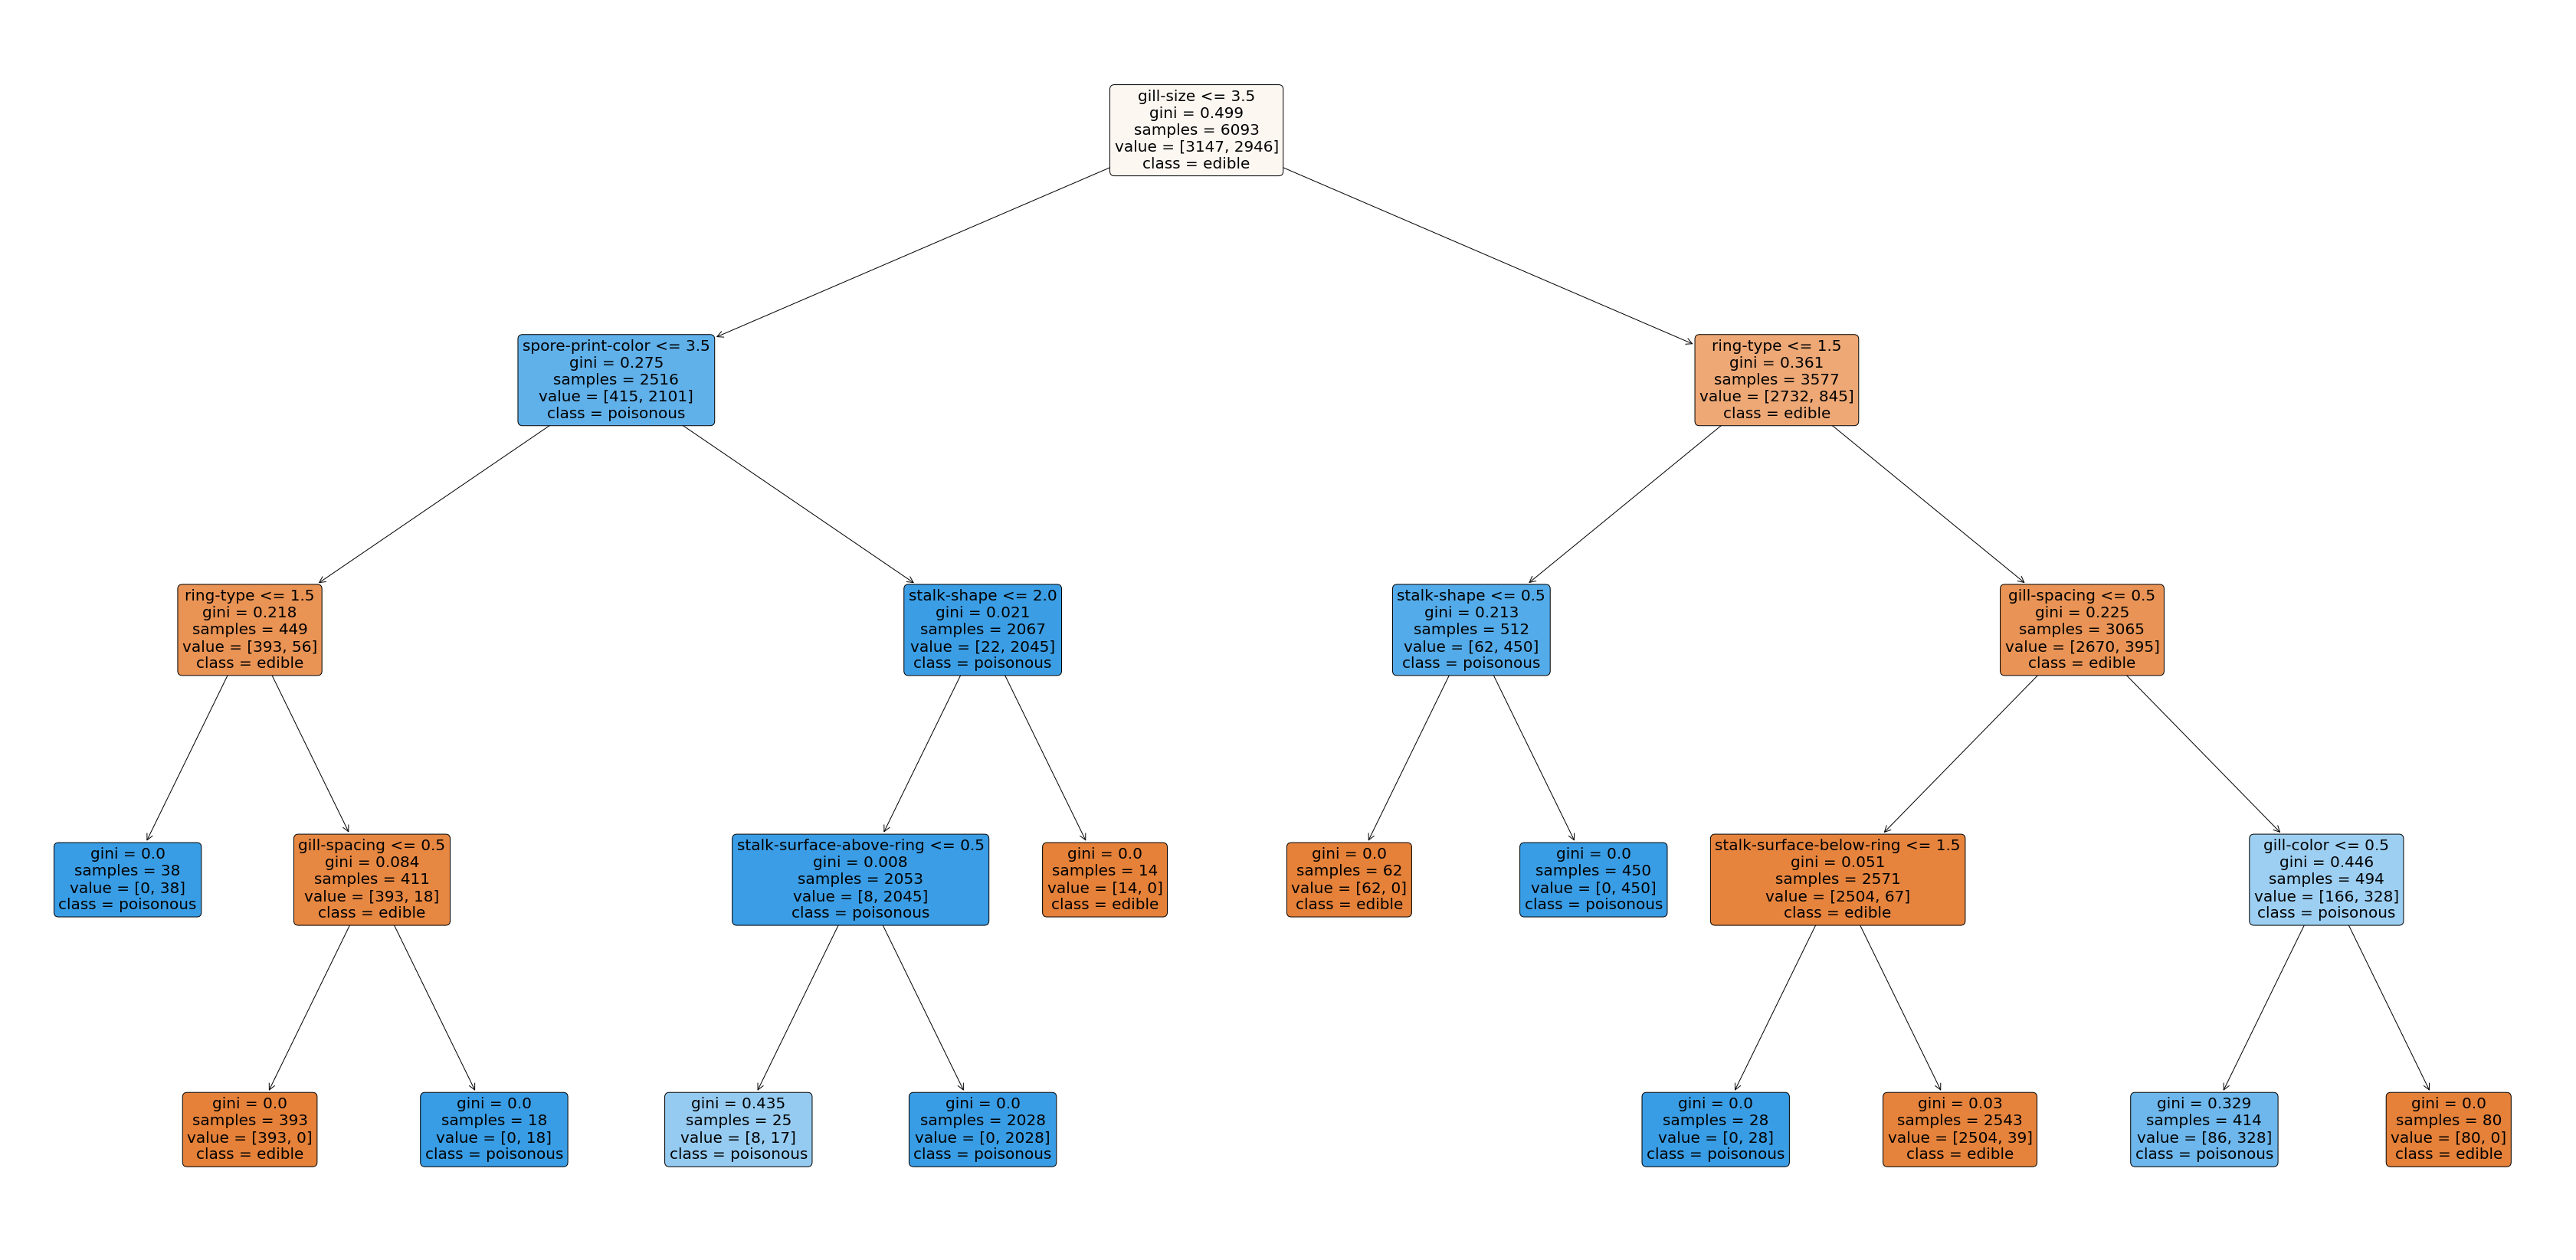

In [ ]:
from sklearn import tree

import matplotlib.pyplot as plt
plt.figure(figsize=(60,30), facecolor ='white')

labels = ['edible','poisonous']

a = tree.plot_tree(dt_model, feature_names = dfmushroom.columns,class_names = labels, rounded = True,filled = True,fontsize=20)

plt.show()

**Part 3: Feature Selection**

In [ ]:
def train_helper(modelname, dfX, dfY):
    idx = 0
    model_accuracy =[]
    for _train,_test in skf.split(dfX, dfY):
        idx += 1
        modelname.fit(dfX.iloc[_train],dfY.iloc[_train])
        ypred = modelname.predict(dfX.iloc[_test])
        model_accuracy.append(accuracy_score(dfY.iloc[_test],ypred))
    return np.array(model_accuracy).mean()*100 

In [ ]:
#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def feature_plot(dt_model):
  k = []
  acc = []
  for i in range(2,19):
    X_new = SelectKBest(chi2, k=i).fit_transform(dfX, dfY)
    X_new = pd.DataFrame(X_new)
    x = train_helper(dt_model, X_new,dfY)
    k.append(i)
    acc.append(x)
  plt.plot(k, acc)
 #set title and x, y - axes labels
  plt.title('Accuracy vs Number of Attributes')
  plt.xlabel('Number of Attributes')
  plt.ylabel('Accuracy')
  #show plot to user
  plt.show()

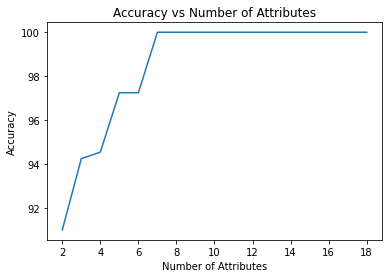

In [ ]:
dt_model = DecisionTreeClassifier()
feature_plot(dt_model)

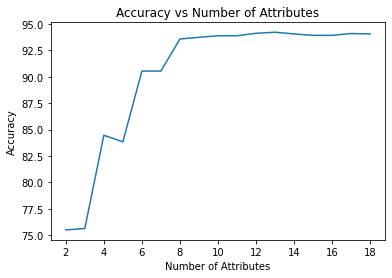

In [ ]:
svc_model = SVC(kernel='linear')
feature_plot(svc_model)

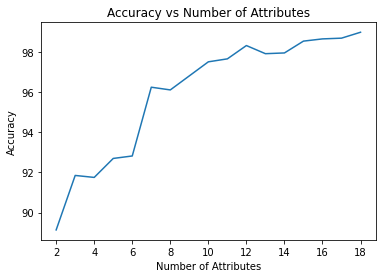

In [ ]:
svc_model = SVC(kernel='rbf')
feature_plot(svc_model)